In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import dataset, distance, find, historical, split
np.seterr('raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

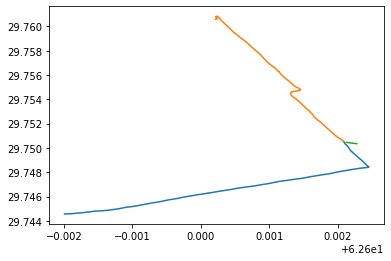

600.6931269940324
17.64384526021178


In [2]:
target_trajectory, data = dataset.load_users_trajectories_with_target(898, 1376323154598)
head, tail = split.split_trajectory_with_overlap(target_trajectory, 0.5)

head_y, head_x = head[:, 0], head[:, 1]
tail_y, tail_x = tail[:, 0], tail[:, 1]

prediction = historical.predict_by_picking_random_tail(data, head, 5)
pred_y, pred_x = prediction[:, 0], prediction[:, 1]

plt.plot(head_y, head_x)
plt.plot(tail_y, tail_x)
plt.plot(pred_y, pred_x)
plt.show()

print(distance.calculate_trajectory_length_in_meters(tail))
print(distance.calculate_trajectory_length_in_meters(prediction))

In [3]:
THRESHOLD = 10
findings = find.find_point_overlapping_trajectories(data, head[-1], THRESHOLD)

print(len(findings))

4


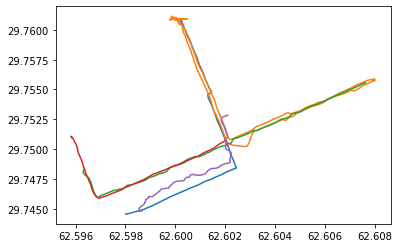

In [4]:
target_y, target_x = target_trajectory[:, 0], target_trajectory[:, 1]
plt.plot(target_y, target_x)

for f in findings:
    y, x = f[:, 0], f[:, 1]
    plt.plot(y, x)
plt.show()